# 1. Isomorphic testing

is_isomorphic function in Networkx:

Returns True if the graphs G1 and G2 are isomorphic and False otherwise

(The two graphs G1 and G2 must be the same type)

In [8]:
import networkx as nx
import networkx.algorithms.isomorphism as iso

#create graph 1
G1 = nx.Graph()

G1.add_nodes_from(['A','B','C','D','E','F'])

G1.add_edges_from([('A','B'),('A','C'),('A','D'),('A','E'),('A','F')])


#create graph 2
G2 = nx.star_graph(5)

## 1.1. Testing if two graphs are isomorphic

In [2]:
nx.is_isomorphic(G1, G2)

True

## 1.2 NetworkX isomorphism - how to find edge mapping

In [3]:
import networkx as nx
G1 = nx.Graph()
G1.add_weighted_edges_from([(0,1,0), (0,2,1), (0,3,2)], weight = 'aardvark')
G2 = nx.Graph()
G2.add_weighted_edges_from([(0,1,0), (0,2,2), (0,3,1)], weight = 'baboon')
G3 = nx.Graph()
G3.add_weighted_edges_from([(0,1,0), (0,2,2), (0,3,2)], weight = 'baboon')

def comparison(D1, D2):    
    #for an edge u,v in first graph and x,y in second graph
    #this tests if the attribute 'aardvark' of edge u,v is the 
    #same as the attribute 'baboon' of edge x,y.

    return D1['aardvark'] == D2['baboon']

nx.is_isomorphic(G1, G2, edge_match = comparison)


True

In [4]:
nx.is_isomorphic(G1, G3, edge_match = comparison)

False

# 2. gSpan method

#### gSpan/graphdata/

Data File Format:

"t # N" means the Nth graph,

"v M L" means that the Mth vertex in this graph has label L,

"e P Q L" means that there is an edge connecting the Pth vertex with the Qth vertex. The edge has label L.


In [2]:
from gspan_mining.config import parser
from gspan_mining.main import main

In [3]:
%matplotlib inline


In [4]:
args_str = '-s 2 -d True -l 5 -p True -w True graphdata/graph.data.simple.5'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

#### Pandas >2.0 doesn't have concat, so copy gspan.py in given folder on Github from line 338-347 to your environment (e.g. ~/anaconda3/envs/GraphMining/lib/python3.13/site-packages/gspan_mining/gspan.py) from line 335

t # 0
v 0 2
v 1 2
v 2 3
v 3 4
v 4 2
e 0 1 2
e 0 4 2
e 1 2 3
e 2 3 2

Support: 2


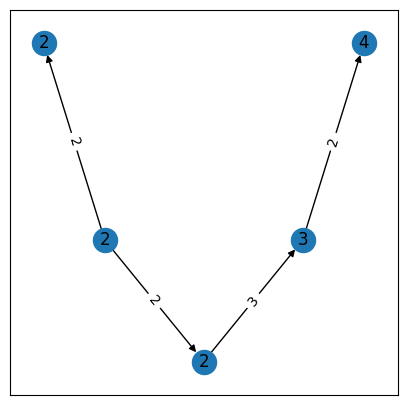

where: [0, 3]

-----------------

t # 1
v 0 2
v 1 2
v 2 2
v 3 3
v 4 4
e 0 1 2
e 1 2 2
e 1 3 3
e 3 4 2

Support: 2


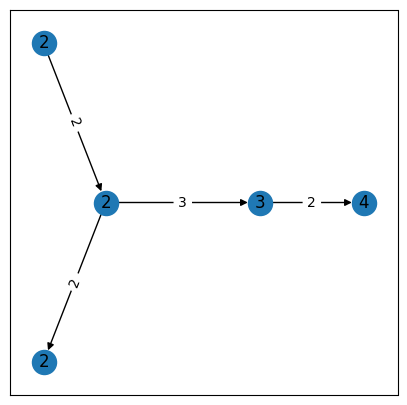

where: [0, 3]

-----------------

t # 2
v 0 2
v 1 2
v 2 2
v 3 3
v 4 4
v 5 2
e 0 1 2
e 0 5 2
e 1 2 2
e 1 3 3
e 3 4 2

Support: 2


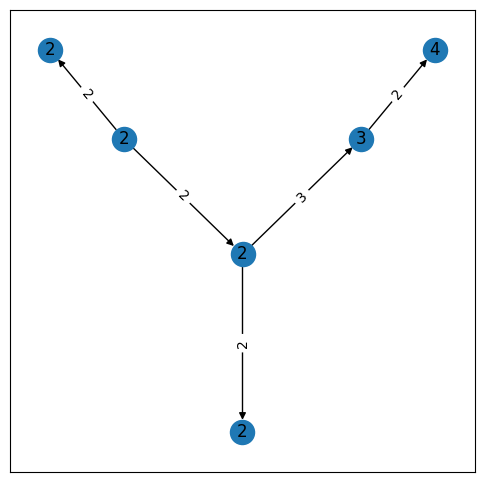

where: [0, 3]

-----------------

t # 3
v 0 2
v 1 2
v 2 2
v 3 3
v 4 2
e 0 1 2
e 0 4 2
e 1 2 2
e 1 3 3

Support: 2


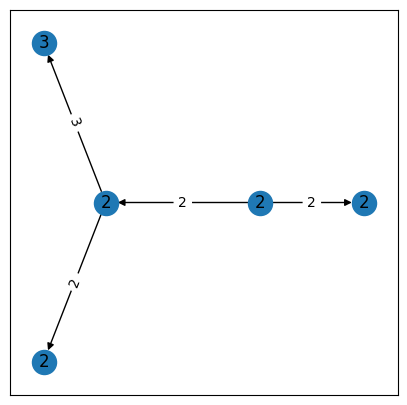

where: [0, 3]

-----------------

Read:	0.0 s
Mine:	0.21 s
Total:	0.21 s


In [5]:
gs = main(FLAGS)
print(gs)

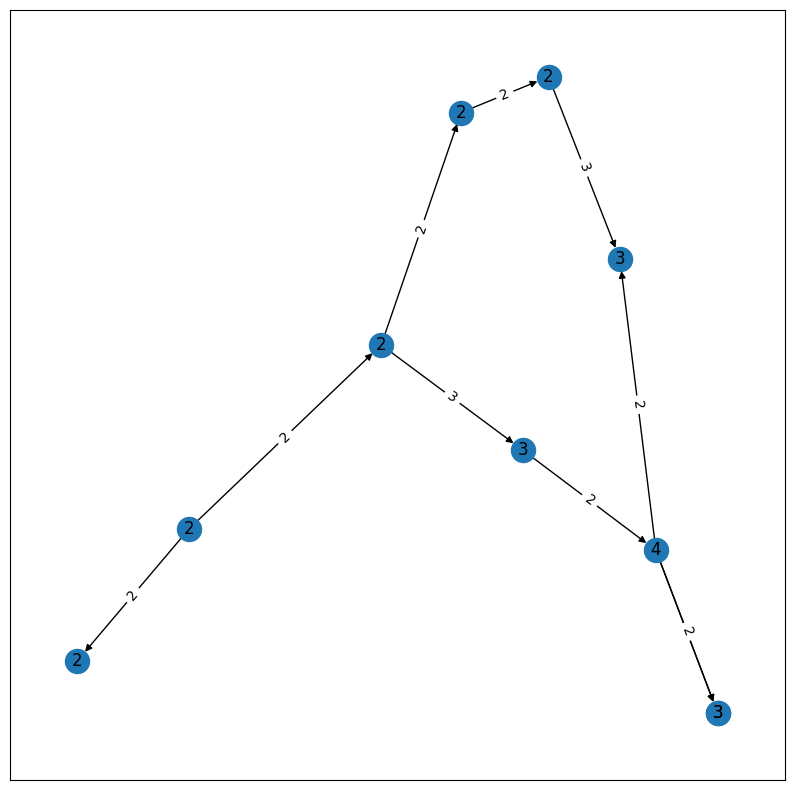

In [6]:
gs.graphs[0].plot()

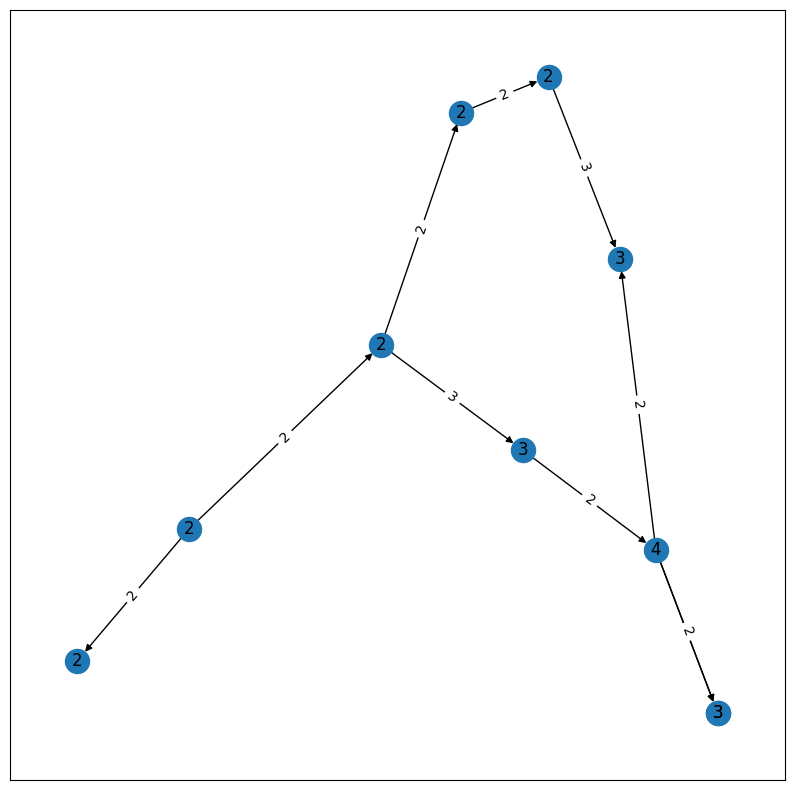

In [9]:

G1 = nx.Graph(gs.graphs[0].plot())

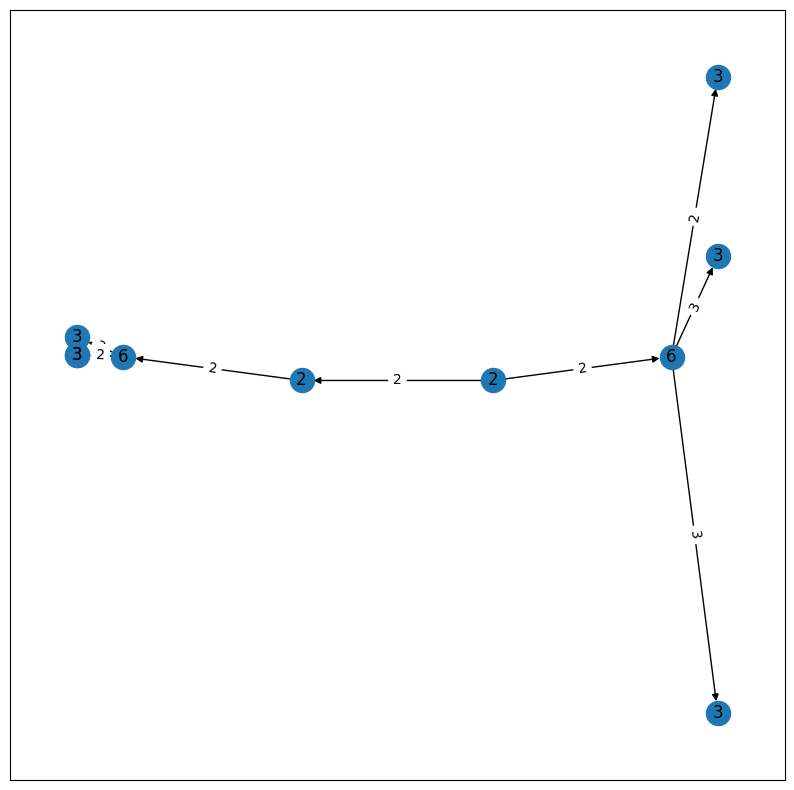

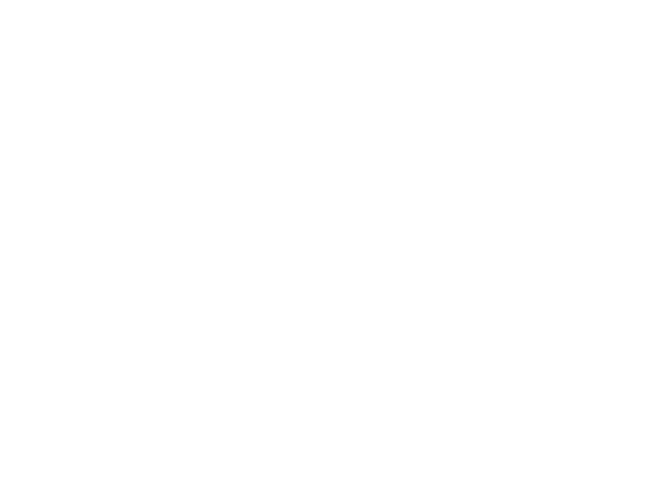

In [11]:
G1 = nx.Graph(gs.graphs[1].plot())

nx.draw(G1, pos=nx.shell_layout(G1),with_labels = True)


In [10]:
args_str = '-s 2 -l 3 -p True graphdata/sample_data3'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

t # 0
v 0 A
v 1 B
v 2 C
e 0 1 1
e 1 2 1

Support: 2


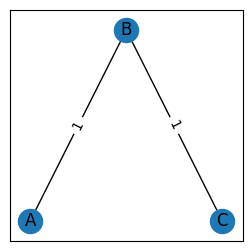


-----------------

t # 1
v 0 A
v 1 B
v 2 A
e 0 1 1
e 1 2 1

Support: 2


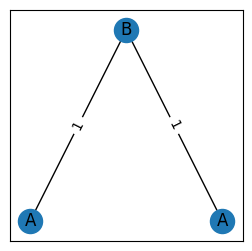


-----------------

t # 2
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 2


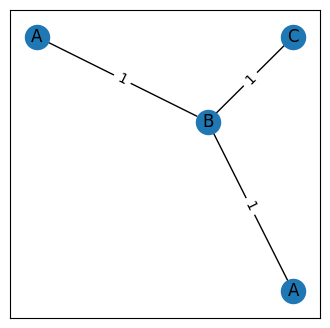


-----------------

t # 3
v 0 A
v 1 A
v 2 B
e 0 1 1
e 1 2 1

Support: 2


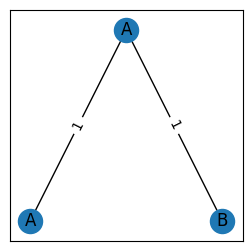


-----------------

t # 4
v 0 A
v 1 A
v 2 B
e 0 1 1
e 0 2 1
e 1 2 1

Support: 2


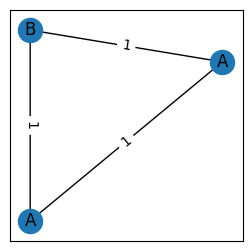


-----------------

t # 5
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 2 3 1

Support: 2


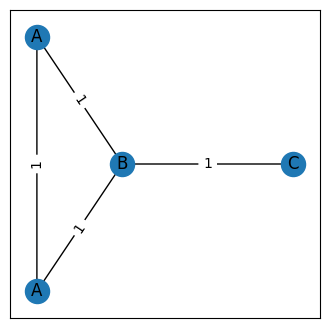


-----------------

t # 6
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


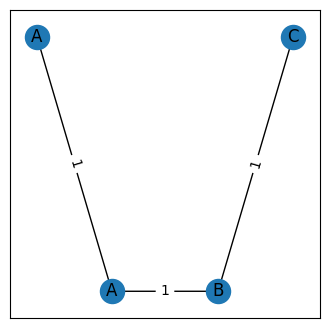


-----------------

Read:	0.0 s
Mine:	0.22 s
Total:	0.22 s


In [11]:
gs = main(FLAGS)
print(gs)

# 3. Subdue

#### Use given Subdue_mining on Github


In [13]:
import os
import subprocess
import json
import re
import contextlib
import io
import sys
import networkx as nx

from Subdue_mining import Parameters
from Subdue_mining.Subdue import ReadGraph, Subdue, nx_subdue

subdue_example_path = './graphdata/inputgraph.json'
tolerance_pct = 0.1  # mainly due to non-deterministic nature of the algorithm

def subdue_json_to_undirected_nx_graph(subdue_json_path):
    with open(subdue_json_path, 'r') as subdue_json_file:
        subdue_format = json.load(subdue_json_file)

    graph = nx.Graph()
    for vertex_or_edge in subdue_format:
        if list(vertex_or_edge.keys()) == ['vertex']:
            node_attributes_loop = vertex_or_edge['vertex']['attributes']
            graph.add_node(
                vertex_or_edge['vertex']['id'],
                **node_attributes_loop,
            )
        elif list(vertex_or_edge.keys()) == ['edge']:
            edge_attributes_loop = vertex_or_edge['edge']['attributes']
            graph.add_edge(
                u_of_edge=vertex_or_edge['edge']['source'],
                v_of_edge=vertex_or_edge['edge']['target'],
                **edge_attributes_loop,
            )
        else:
            raise ValueError('Invalid entry type')

    return graph

# use networkx graph as an input
subdue_example_graph = subdue_json_to_undirected_nx_graph(subdue_example_path)
capture_prints = io.StringIO()
with contextlib.redirect_stdout(capture_prints):
    result = nx_subdue(graph=subdue_example_graph, verbose=True)
prints_nx_subdue = capture_prints.getvalue()


In [14]:
prints_nx_subdue

'Graph: 15 vertices, 15 edges\n7 patterns left\n4 patterns left\n1 patterns left\nNo more patterns to consider\n\nBest 3 patterns:\n\n  Pattern (value=0.8, instances=5):\n    Graph:\n      vertex "1": timestamp=0, label=v1\n      vertex "2": timestamp=0, label=v2\n      vertex "3": timestamp=0, label=v3\n      edge "1" (1--2): timestamp=0, label=e12\n      edge "2" (1--3): timestamp=0, label=e13\n      edge "3" (2--3): timestamp=0, label=e23\n    Instance 1:\n      vertex "1": timestamp=0, label=v1\n      vertex "2": timestamp=0, label=v2\n      vertex "3": timestamp=0, label=v3\n      edge "1-2" (1--2): timestamp=0, label=e12\n      edge "1-3" (1--3): timestamp=0, label=e13\n      edge "2-3" (2--3): timestamp=0, label=e23\n    Instance 2:\n      vertex "4": timestamp=0, label=v1\n      vertex "5": timestamp=0, label=v2\n      vertex "6": timestamp=0, label=v3\n      edge "4-5" (4--5): timestamp=0, label=e12\n      edge "4-6" (4--6): timestamp=0, label=e13\n      edge "5-6" (5--6): tim

In [15]:
result

[[{'nodes': ['1', '2', '3'], 'edges': [('1', '2'), ('1', '3'), ('2', '3')]},
  {'nodes': ['4', '5', '6'], 'edges': [('4', '5'), ('4', '6'), ('5', '6')]},
  {'nodes': ['7', '8', '9'], 'edges': [('7', '8'), ('7', '9'), ('8', '9')]},
  {'nodes': ['10', '11', '12'],
   'edges': [('10', '11'), ('10', '12'), ('11', '12')]},
  {'nodes': ['13', '14', '15'],
   'edges': [('13', '14'), ('13', '15'), ('14', '15')]}],
 [{'nodes': ['1', '2', '3'], 'edges': [('1', '2'), ('1', '3')]},
  {'nodes': ['4', '5', '6'], 'edges': [('4', '5'), ('4', '6')]},
  {'nodes': ['7', '8', '9'], 'edges': [('7', '8'), ('7', '9')]},
  {'nodes': ['10', '11', '12'], 'edges': [('10', '11'), ('10', '12')]},
  {'nodes': ['13', '14', '15'], 'edges': [('13', '14'), ('13', '15')]}],
 [{'nodes': ['1', '2', '3'], 'edges': [('1', '2'), ('2', '3')]},
  {'nodes': ['4', '5', '6'], 'edges': [('4', '5'), ('5', '6')]},
  {'nodes': ['7', '8', '9'], 'edges': [('7', '8'), ('8', '9')]},
  {'nodes': ['10', '11', '12'], 'edges': [('10', '11'),

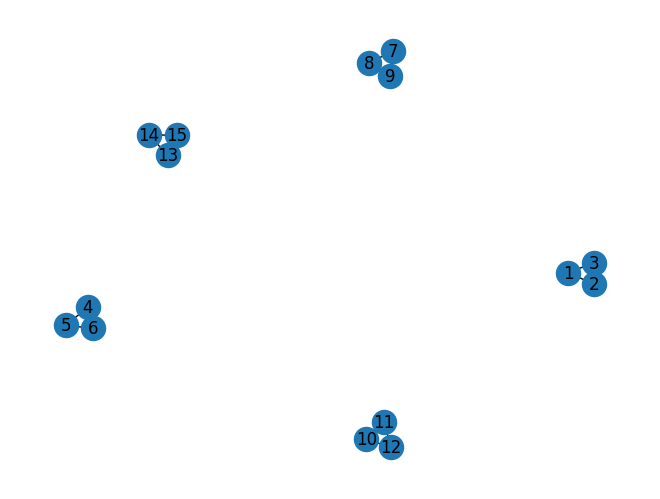

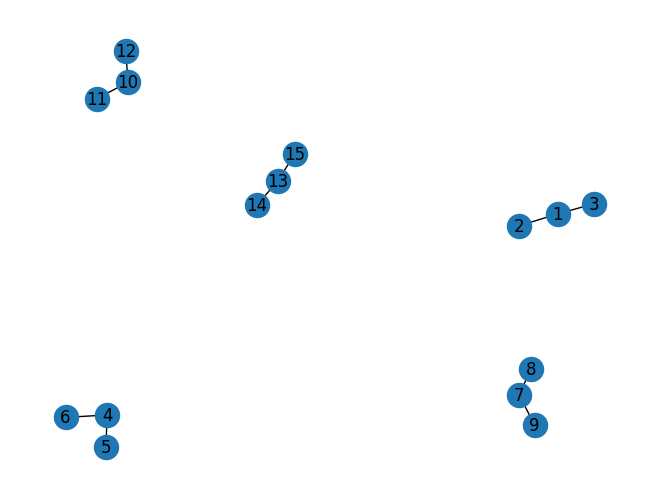

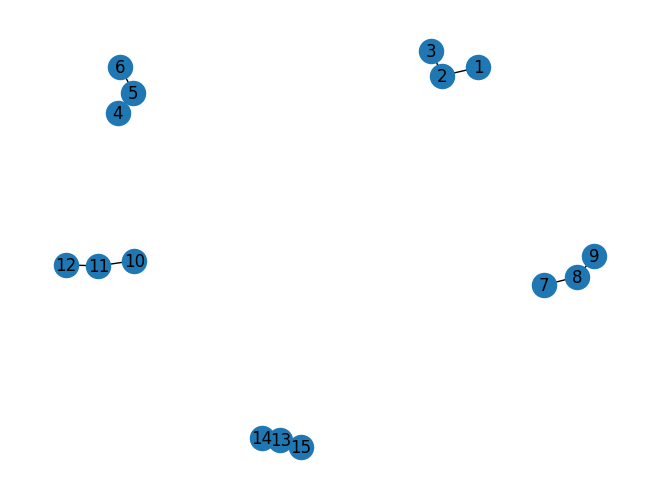

In [16]:
import matplotlib.pyplot as plt

# Create a new graph for each list and add nodes and edges
graphs = []
for graph_data in result:
    G = nx.Graph()
    for subgraph_data in graph_data:
        G.add_nodes_from(subgraph_data['nodes'])
        G.add_edges_from(subgraph_data['edges'])
    graphs.append(G)

# Draw the graphs
for i, G in enumerate(graphs):
    plt.figure(i)
    nx.draw(G, with_labels=True)
plt.show()